# Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Importing the dataset

In [26]:
df = pd.read_csv('../datasets/cardio_train.csv', sep = ';')

# Exploratory data analysis

In [28]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.shape

(70000, 13)

# Missing values and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# weight probably doesn't need to be a float value
df['weight'].head(50)

0      62.0
1      85.0
2      64.0
3      82.0
4      56.0
5      67.0
6      93.0
7      95.0
8      71.0
9      68.0
10     80.0
11     60.0
12     60.0
13     78.0
14     95.0
15    112.0
16     75.0
17     52.0
18     68.0
19     56.0
20     83.0
21     69.0
22     90.0
23     45.0
24     68.0
25     65.0
26     59.0
27     78.0
28     66.0
29     74.0
30    105.0
31     71.0
32     60.0
33     73.0
34     82.0
35     55.0
36     95.0
37     70.0
38     72.0
39     70.0
40     62.0
41     68.0
42     69.0
43     63.0
44     50.0
45     64.0
46    107.0
47     69.0
48     70.0
49     69.0
Name: weight, dtype: float64

# Looking at the categories present in the cholesterol and gluc columns

In [7]:
df['cholesterol'].unique()

array([1, 3, 2], dtype=int64)

In [8]:
df['cholesterol'].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [9]:
df['gluc'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
df['gluc'].value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

# Correlations

<AxesSubplot:>

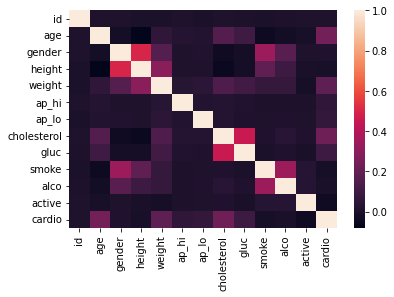

In [11]:
sns.heatmap(df.corr())

# Outliers

In [12]:
# ap_hi and ap_lo have some outliers (the difference between the max and 75% percentile is high)
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

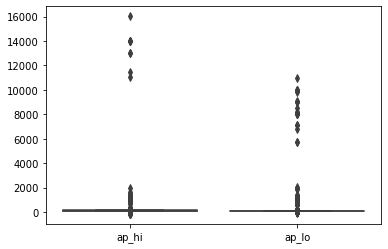

In [13]:
sns.boxplot(data=df[['ap_hi', 'ap_lo']])

In [14]:
df[df['ap_hi'] > 4000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1
40852,58374,17438,1,169,70.0,16020,80,1,1,0,0,0,1
46912,66998,16910,2,180,78.0,14020,90,1,1,0,0,1,1
47253,67502,19731,1,160,65.0,14020,90,1,1,0,0,1,0
51438,73356,18784,2,168,65.0,11020,80,1,1,0,0,1,1
55459,79116,18307,1,152,76.0,13010,80,2,2,0,0,1,1
55847,79679,23182,1,161,105.0,13010,80,1,1,0,0,0,0


In [15]:
df[df['ap_hi'] > 4000]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
7763,11089,21032,1,175,80.0,11500,90,1,1,0,0,1,1
25464,36339,15835,2,169,75.0,14020,80,2,1,0,0,1,1
25519,36414,21361,1,169,71.0,14020,80,3,3,0,0,1,1
40852,58374,17438,1,169,70.0,16020,80,1,1,0,0,0,1
46912,66998,16910,2,180,78.0,14020,90,1,1,0,0,1,1
47253,67502,19731,1,160,65.0,14020,90,1,1,0,0,1,0
51438,73356,18784,2,168,65.0,11020,80,1,1,0,0,1,1
55459,79116,18307,1,152,76.0,13010,80,2,2,0,0,1,1
55847,79679,23182,1,161,105.0,13010,80,1,1,0,0,0,0


In [16]:
df = df.drop(df.loc[(df['ap_hi'] > 4000) | (df['ap_lo'] > 4000)].index)

In [17]:
df[(df['ap_hi'] > 4000) | (df['ap_lo'] > 4000)]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


# Change types

In [18]:
df['weight'] = np.floor(pd.to_numeric(df['weight'], errors='coerce')).astype('int64')

In [19]:
df.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

# Exporting preprocessed dataset

In [20]:
df.to_csv('../datasets/cardio_preprocessed.csv')

In [21]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
